# Praca domowa 2
## Karol Degórski

## Analiza zbioru danych *Allegro*

## Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

import category_encoders as ce

from matplotlib import pyplot as plt
import seaborn as sns

## Wczytanie danych dotyczących transakcji w serwisie Allgero

In [2]:
allegro_df = pd.read_csv('allegro-api-transactions.csv')
allegro_df

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


In [3]:
allegro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

## Kodowanie zmiennych kategorycznych

### Target Encoding

Wykres przedstawia ile razy w it_location występuje dane miasto. Jest to zmienna, którą będziemy kodować używając Target Encoder

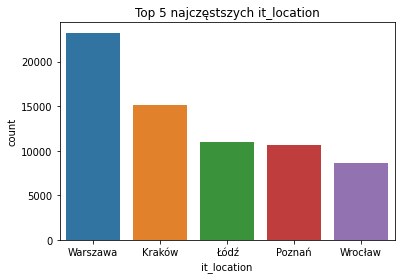

In [4]:
sns.countplot(data = allegro_df, x = 'it_location', order=allegro_df.it_location.value_counts().iloc[:5].index)
plt.title('Top 5 najczęstszych it_location')
plt.show()

Sprawdźmy ile jest unikalnych wartości w it_location

In [5]:
len(allegro_df['it_location'].unique())

10056

Okazuje się, że jest ponad 10 tysięcy unikalnych wartości w it_location. Oznacza to, że One Hot Encoding dodałby ponad 10 tysięcy kolumn do naszej ramki danych. Zatem w tym przypadku, użycie One Hot Enocding nie jest optymalnym wyborem.

Użyjmy zatem Target Encoding

In [6]:
te = ce.TargetEncoder()
enc_te = te.fit_transform(allegro_df['it_location'], allegro_df['price'])

allegro_df['target_encoded'] = enc_te
allegro_df = allegro_df.drop(columns = 'it_location') 
allegro_df

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,main_category,target_encoded
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Komputery,85.423398
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,"Odzież, Obuwie, Dodatki",85.423398
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Dom i Ogród,61.990914
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Książki i Komiksy,35.433365
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,"Odzież, Obuwie, Dodatki",117.191956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,RTV i AGD,24.306929
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Uroda,66.785334
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,"Odzież, Obuwie, Dodatki",18.682800
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Dla Dzieci,106.203076


Target Encoding polega na obliczneniu średniej celu dla każdej kategorii i zamianie tej kategorii na wartość liczbową (obliczoną średnią).


Target Encoding nie zwiększa wymiarowości danych w przeciwieństwie do One Hot. Jednakże Target Encoding zależy od rozkładu celu, dlatego też może być podatny na overfitting. Ponadto może się zdarzyć, że rozkłady danej zmiennej w zbiorze treningowym i testowym będą się różniły.

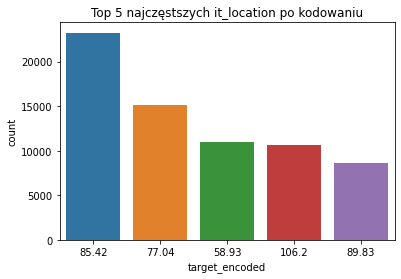

In [7]:
target_encoded_vec = pd.DataFrame(data=allegro_df['target_encoded'].round(2))

sns.countplot(data = target_encoded_vec, x ='target_encoded', order=target_encoded_vec.target_encoded.value_counts().iloc[:5].index)
plt.title('Top 5 najczęstszych it_location po kodowaniu')
plt.show()

Na przykładzie 5 najbardziej popularnych it_location widzimy, że nazwy miast zostały zakodowane za pomocą liczb

### One Hot Encoding

In [8]:
oh = ce.OneHotEncoder()
enc_oh = oh.fit_transform(allegro_df['main_category'])
allegro_df_oh = allegro_df.join(enc_oh)  
allegro_df_oh

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,main_category,target_encoded,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,main_category_11,main_category_12,main_category_13,main_category_14,main_category_15,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Komputery,85.423398,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,"Odzież, Obuwie, Dodatki",85.423398,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Dom i Ogród,61.990914,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Książki i Komiksy,35.433365,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,"Odzież, Obuwie, Dodatki",117.191956,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,RTV i AGD,24.306929,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Uroda,66.785334,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,"Odzież, Obuwie, Dodatki",18.682800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Dla Dzieci,106.203076,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


One Hot Encoding dodaje tyle kolumn ile jest kategorii w danej kolumnie i dokonuje binarnego kodowania tych kategorii.

Niewątpliwą wadą One Hot Encoding jest zwiększanie wymiarowości danych, co jest szczególnie widoczne gdy mamy dużo unikalnych kategorii (przykładowo jeśli jest 50 różnych kategorii to One Hot Encoding doda 50 kolumn do ramki danych, które będą zawierały bardzo dużo 0). Natomiast zaletą jest jego prostota (bardzo łatwo zrozumieć proces kodowania danych)

### Hash Encoding

In [9]:
he = ce.HashingEncoder()
enc_he = he.fit_transform(allegro_df['main_category'])
allegro_df_he = allegro_df.join(enc_he)  
allegro_df_he

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,main_category,target_encoded,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Komputery,85.423398,0,0,0,0,0,0,1,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,"Odzież, Obuwie, Dodatki",85.423398,0,0,1,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Dom i Ogród,61.990914,0,0,0,0,0,0,1,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Książki i Komiksy,35.433365,0,0,1,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,"Odzież, Obuwie, Dodatki",117.191956,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,RTV i AGD,24.306929,0,0,0,1,0,0,0,0
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Uroda,66.785334,0,0,0,0,1,0,0,0
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,"Odzież, Obuwie, Dodatki",18.682800,0,0,1,0,0,0,0,0
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Dla Dzieci,106.203076,0,0,0,0,0,1,0,0


Hash Encoding oblicza wartość funkcji hashującej dla kategorii i w ten sposób zapisuje informację o danej kategorii. Zwiększa to wymiarowość danych, ale dzięki obliczaniu funkcji hashującej możemy kontrolować o ile (parametr n_components). Jednakże jeśli mamy dużo różnych kategorii i ustawimy niski parametr n_components, to wiele różnych kategorii otrzyma tę samą wartość funkcji hashującej i będą traktowane jako taka sama kategoria, czyli tracimy informacje. Wadą tego rodzaju kodowania jest też wolny czas działania.

### Binary Encoding

In [10]:
be = ce.BinaryEncoder()
enc_be = be.fit_transform(allegro_df['main_category'])
allegro_df_be = allegro_df.join(enc_be)  
allegro_df_be

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,main_category,target_encoded,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Komputery,85.423398,0,0,0,0,0,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,"Odzież, Obuwie, Dodatki",85.423398,0,0,0,0,1,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Dom i Ogród,61.990914,0,0,0,0,1,1
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Książki i Komiksy,35.433365,0,0,0,1,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,"Odzież, Obuwie, Dodatki",117.191956,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,RTV i AGD,24.306929,0,0,0,1,1,0
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Uroda,66.785334,0,0,1,0,0,1
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,"Odzież, Obuwie, Dodatki",18.682800,0,0,0,0,1,0
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Dla Dzieci,106.203076,0,0,1,0,0,0


Binary Encoding na początku zamienia zmienne kategoryczne na numeryczne używając Ordinal Encoder. Następnie liczby te są zamieniane na liczby binarne i rozdzielane na różne kolumny. Kodowanie to jest wydajne. Zwiększa wymiarowość, ale nie tak bardzo jak One Hot Encoding. Warto rozważyć jego użycie, gdy mamy dużo różnych kategorii.

## Uzupełnianie braków danych

In [11]:
# Przygotowanie ramki danych zgodnie z poleceniem z zadania (ograniczenie zbioru danych)
allegro_df_ub = allegro_df[['price', 'it_seller_rating', 'it_quantity']]
allegro_df_ub

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950
...,...,...,...
420015,180.00,176,0
420016,14.99,34851,2
420017,5.99,983,470
420018,200.00,163,0


In [12]:
# Zostawiam 10% danych z powodu wolnego działania

liczba_usunac = int(len(allegro_df_ub) * 0.9)
wiersze_usunac = np.random.choice(allegro_df_ub.index, liczba_usunac, replace=False)
allegro_df_ub = allegro_df_ub.drop(wiersze_usunac)

allegro_df_ub

,price,it_seller_rating,it_quantity
3,18.50,15006,971
10,1.50,5430,0
21,100.00,2023,1
22,29.00,34102,3
23,7.98,10086,204
...,...,...,...
419879,77.00,23872,591
419907,29.90,44,291
419989,4.49,203,8
419997,228.99,26880,11


### Pierwsza część zadania - usuwamy 10% obserwacji z  it_seller_rating

In [13]:
# Przygotowanie ramki danych zgodnie z poleceniem z zadania 
# (losowe usunięcie 10% wartości ze zmiennej it_seller_rating)


allegro_df_ub_del = allegro_df_ub.copy()
liczba_usunac = int(len(allegro_df_ub_del) * 0.1)
wiersze_usunac = np.random.choice(allegro_df_ub_del.index, liczba_usunac, replace=False)
allegro_df_ub_del['it_seller_rating'] = allegro_df_ub_del['it_seller_rating'].drop(wiersze_usunac)
allegro_df_ub_del

,price,it_seller_rating,it_quantity
3,18.50,NaN,971
10,1.50,5430.0,0
21,100.00,2023.0,1
22,29.00,34102.0,3
23,7.98,10086.0,204
...,...,...,...
419879,77.00,23872.0,591
419907,29.90,44.0,291
419989,4.49,203.0,8
419997,228.99,26880.0,11


In [14]:
allegro_df_ub_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42002 entries, 3 to 420015
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             42002 non-null  float64
 1   it_seller_rating  37802 non-null  float64
 2   it_quantity       42002 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.3 MB


Udało się usunąć 10% wartosci z it_seller_rating

### Nearest neighbors imputation

Nearest neighbors imputation zastąpuje brakujące dane wykorzystując średnią wartość n_neighbors rekordów.

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
allegro_df_ub_imp = imputer.fit_transform(allegro_df_ub_del)
allegro_df_ub_imp = pd.DataFrame(allegro_df_ub_imp, columns = ['price','it_seller_rating','it_quantity'])

In [16]:
allegro_df_ub_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42002 entries, 0 to 42001
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             42002 non-null  float64
 1   it_seller_rating  42002 non-null  float64
 2   it_quantity       42002 non-null  float64
dtypes: float64(3)
memory usage: 984.5 KB


Udało się uzupełnić brakujące dane

### Porównanie wartości imputowanych z oryginalnymi

In [17]:
allegro_df_ub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42002 entries, 3 to 420015
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             42002 non-null  float64
 1   it_seller_rating  42002 non-null  int64  
 2   it_quantity       42002 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [18]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(allegro_df_ub['it_seller_rating'], allegro_df_ub_imp['it_seller_rating'], squared=False)
rmse

13326.179996310397

Wysoka wartość RMSE dla imputowanych danych. Oznacza to niezbyt dokładne przybliżenie brakujących wartości

### Wykonanie eksperymentu (10 losowych powtórzeń)

In [19]:
miary_rmse = []

In [20]:
for i in range(0,10):
    allegro_df_ub_del = allegro_df_ub.copy()
    liczba_usunac = int(len(allegro_df_ub_del) * 0.1)
    wiersze_usunac = np.random.choice(allegro_df_ub_del.index, liczba_usunac, replace=False)
    allegro_df_ub_del['it_seller_rating'] = allegro_df_ub_del['it_seller_rating'].drop(wiersze_usunac)
    allegro_df_ub_imp = imputer.fit_transform(allegro_df_ub_del)
    allegro_df_ub_imp = pd.DataFrame(allegro_df_ub_imp, columns = ['price','it_seller_rating','it_quantity'])
    rmse = mean_squared_error(allegro_df_ub['it_seller_rating'], allegro_df_ub_imp['it_seller_rating'], squared=False)
    miary_rmse.append(rmse)

In [21]:
miary_rmse

[13568.670280254639,
 13393.478378405365,
 13714.361378341657,
 13256.846135744996,
 12813.412111533637,
 13809.82772103274,
 13889.896149597982,
 13150.651517119924,
 14088.020489874632,
 13525.159150092528]

In [22]:
# Odchylenie standardowe wyniku
sd = np.std(miary_rmse)
sd

361.1888800259299

Wysoka wartość odchylenia standardowego oznacza, że wartości RMSE są szeroko rozrzucone (imputacja przebiega z różną dokładnością)

### Druga część zadania - usuwamy 10% obserwacji z  it_seller_rating i z it_quantity

In [23]:
# Przygotowanie ramki danych zgodnie z poleceniem z drugiej części zadania 
# (losowe usunięcie 10% wartości ze zmiennej it_seller_rating i 10% z it_quantity)

allegro_df_ub_del = allegro_df_ub.copy()
liczba_usunac = int(len(allegro_df_ub_del) * 0.1)
wiersze_usunac_seller = np.random.choice(allegro_df_ub_del.index, liczba_usunac, replace=False)
wiersze_usunac_quantity = np.random.choice(allegro_df_ub_del.index, liczba_usunac, replace=False)
allegro_df_ub_del['it_seller_rating'] = allegro_df_ub_del['it_seller_rating'].drop(wiersze_usunac_seller)
allegro_df_ub_del['it_quantity'] = allegro_df_ub_del['it_quantity'].drop(wiersze_usunac_quantity)
allegro_df_ub_del

,price,it_seller_rating,it_quantity
3,18.50,15006.0,NaN
10,1.50,5430.0,0.0
21,100.00,2023.0,1.0
22,29.00,34102.0,3.0
23,7.98,10086.0,204.0
...,...,...,...
419879,77.00,23872.0,591.0
419907,29.90,44.0,291.0
419989,4.49,203.0,NaN
419997,228.99,26880.0,11.0


In [24]:
allegro_df_ub_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42002 entries, 3 to 420015
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             42002 non-null  float64
 1   it_seller_rating  37802 non-null  float64
 2   it_quantity       37802 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


Udało się usunąć 10% wartosci z it_seller_rating i z it_quantity

In [25]:
allegro_df_ub_imp = imputer.fit_transform(allegro_df_ub_del)
allegro_df_ub_imp = pd.DataFrame(allegro_df_ub_imp, columns = ['price','it_seller_rating','it_quantity'])

In [26]:
allegro_df_ub_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42002 entries, 0 to 42001
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             42002 non-null  float64
 1   it_seller_rating  42002 non-null  float64
 2   it_quantity       42002 non-null  float64
dtypes: float64(3)
memory usage: 984.5 KB


Udało się uzupełnić brakujące dane

In [27]:
# Porównanie z oryginalnymi wartościami
rmse_rating = mean_squared_error(allegro_df_ub['it_seller_rating'], allegro_df_ub_imp['it_seller_rating'], squared=False)
rmse_quantity  = mean_squared_error(allegro_df_ub['it_quantity'], allegro_df_ub_imp['it_quantity'], squared=False)
rmse_general = mean_squared_error(allegro_df_ub['it_seller_rating'].append(allegro_df_ub['it_quantity']), allegro_df_ub_imp['it_seller_rating'].append(allegro_df_ub_imp['it_quantity']), squared=False)

print('RMSE dla rating: ' + str(rmse_rating))
print('RMSE dla quantity: ' + str(rmse_quantity))
print('RMSE ogólnie: ' + str(rmse_general))

RMSE dla rating: 14631.44213823815
RMSE dla quantity: 9176.024603504065
RMSE ogólnie: 12212.258729832145


Ponownie wartości RMSE dla imputowanych danych są wysokie. Oznacza to niezbyt dokładne przybliżenie brakujących wartości

### Wykonanie eksperymentu (10 losowych powtórzeń)

In [28]:
miary_rmse_rating = []
miary_rmse_quantity = []
miary_rmse_general = []

In [29]:
for i in range(0,10):
    allegro_df_ub_del = allegro_df_ub.copy()
    liczba_usunac = int(len(allegro_df_ub_del) * 0.1)
    wiersze_usunac_seller = np.random.choice(allegro_df_ub_del.index, liczba_usunac, replace=False)
    wiersze_usunac_quantity = np.random.choice(allegro_df_ub_del.index, liczba_usunac, replace=False)
    allegro_df_ub_del['it_seller_rating'] = allegro_df_ub_del['it_seller_rating'].drop(wiersze_usunac_seller)
    allegro_df_ub_del['it_quantity'] = allegro_df_ub_del['it_quantity'].drop(wiersze_usunac_quantity)
    allegro_df_ub_imp = imputer.fit_transform(allegro_df_ub_del)
    allegro_df_ub_imp = pd.DataFrame(allegro_df_ub_imp, columns = ['price','it_seller_rating','it_quantity'])
    rmse_rating = mean_squared_error(allegro_df_ub['it_seller_rating'], allegro_df_ub_imp['it_seller_rating'], squared=False)
    rmse_quantity  = mean_squared_error(allegro_df_ub['it_quantity'], allegro_df_ub_imp['it_quantity'], squared=False)
    rmse_general = mean_squared_error(allegro_df_ub['it_seller_rating'].append(allegro_df_ub['it_quantity']), allegro_df_ub_imp['it_seller_rating'].append(allegro_df_ub_imp['it_quantity']), squared=False)

    miary_rmse_rating.append(rmse_rating)
    miary_rmse_quantity.append(rmse_quantity)
    miary_rmse_general.append(rmse_general)

In [30]:
print('Miary RMSE dla rating: ' + str(miary_rmse_rating) + '\n')
print('Miary RMSE dla quantity: ' + str(miary_rmse_quantity) + '\n')
print('Miary RMSE ogólne: ' + str(miary_rmse_general))

Miary RMSE dla rating: [14048.877712222547, 14451.854625950296, 14081.132829101836, 14400.8040357119, 14426.652310240832, 13817.074113110497, 15009.637665208342, 13997.886806210652, 14295.964108150532, 14071.737484024503]

Miary RMSE dla quantity: [9255.686679562486, 8637.608554898656, 9724.597589864985, 9027.242919247738, 8770.460641765078, 9208.405399890135, 9726.590065622997, 9319.410643218867, 9399.432656135466, 8920.593092134677]

Miary RMSE ogólne: [11896.190585292712, 11905.133003819392, 12100.539244918331, 12018.200189672425, 11938.368329661458, 11741.08740824107, 12647.050587894335, 11891.010255155517, 12098.01479662581, 11781.14546499493]


In [31]:
# Odchylenie standardowe wyniku
sd_rating = np.std(miary_rmse_rating)
sd_quantity = np.std(miary_rmse_quantity)
sd_general = np.std(miary_rmse_general)

print('Odchylenie standardowe dla rating: ' + str(sd_rating))
print('Odchylenie standardowe dla quantity: ' + str(sd_quantity))
print('Odchylenie standardowe ogólne: ' + str(sd_general))

Odchylenie standardowe dla rating: 320.0862817185976
Odchylenie standardowe dla quantity: 349.05517542274794
Odchylenie standardowe ogólne: 242.70952484242702


### Wnioski

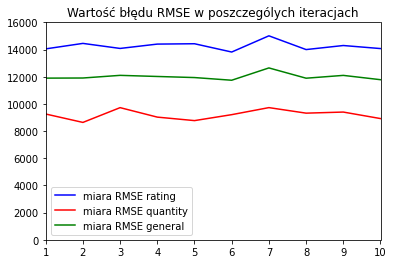

In [32]:
x=list(range(1,11))
fig, ax = plt.subplots()
ax.plot(x, miary_rmse_rating, '-b', label='miara RMSE rating')
ax.plot(x, miary_rmse_quantity, '-r', label='miara RMSE quantity')
ax.plot(x, miary_rmse_general, '-g', label='miara RMSE general')

plt.title("Wartość błędu RMSE w poszczególych iteracjach")
plt.ylim(0,16000)
plt.xlim(1,10)
leg = ax.legend();
plt.show()

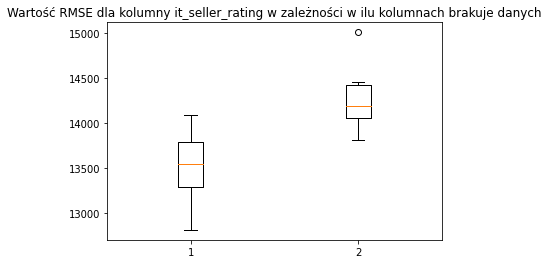

In [33]:
fig, ax = plt.subplots()
ax.boxplot([miary_rmse, miary_rmse_rating])
plt.title("Wartość RMSE dla kolumny it_seller_rating w zależności w ilu kolumnach brakuje danych")
plt.show()

Gdy brakuje danych nie tylko w kolumnie it_seller_rating, ale również w it_quantity, to wartość RMSE jest większa. Nie dziwi nas to, ponieważ narzędzie Nearest neighbours przybliża używając mniejszej liczby danych, co powoduje, że przybliżenie jest mniej dokładne.

Narzędzie Nearest neighbours imputation jest wygodne w użyciu w celu wypełnienia braków danych. Niestety jednak wysoka wartość RMSE wskazuje na niezbyt dokładne przybliżenie braków danych. Dlatego też należy być bardzo uważnym i zanalizować w jaki sposób zastosowanie takiego narzędzia zmieni działanie modelu.